In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
data = pd.read_csv('grains.csv')
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
34,15.05,14.68,0.8779,5.712,3.328,2.129,5.360,0
18,14.70,14.21,0.9153,5.205,3.466,1.767,4.649,0
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
195,12.80,13.47,0.8860,5.160,3.126,4.873,4.914,2
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,1


In [3]:
data.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [ ]:
df = data.iloc[:,0:7]
df.head(3)

In [5]:
df.head(3)

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


# K-Means Clustering

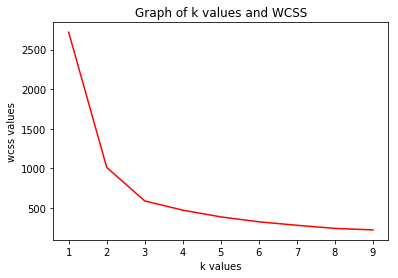

In [6]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

Best value of k is found at 3 (Elbow point)

In [7]:
kmeans2 = KMeans(n_clusters=3)

clusters = kmeans2.fit_predict(df)

df_k = df.copy(deep=True)
df_k['label'] = clusters

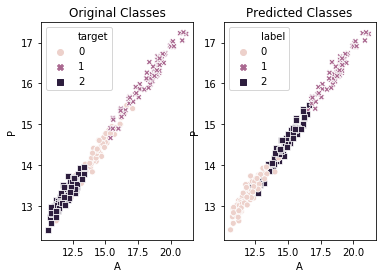

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [10]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64


# Hierarchical Clustering

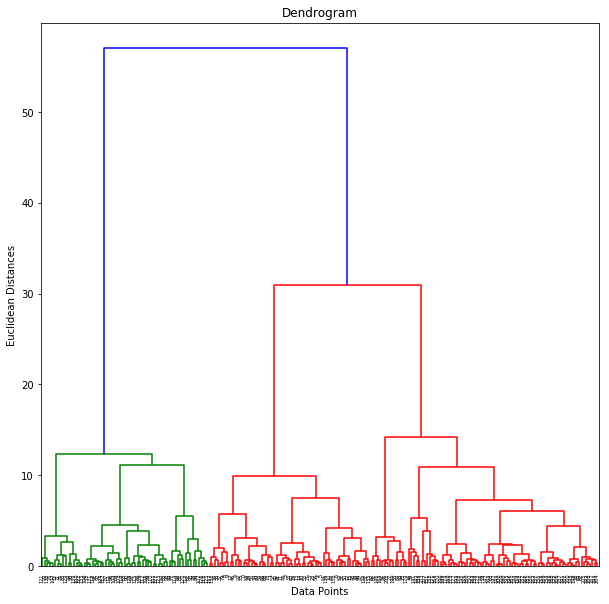

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

From figure it's seen that the dataset contains 3 classes 

In [12]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

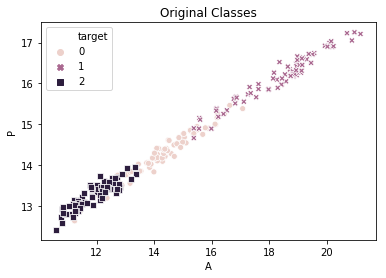

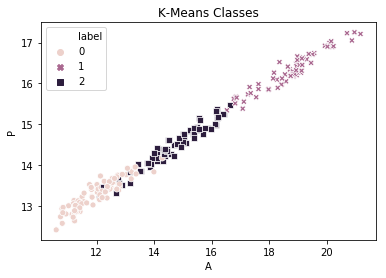

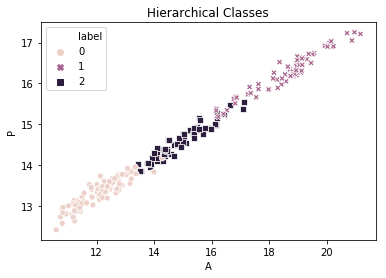

In [13]:
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_h)
plt.show()

In [14]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64


# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pc = PCA()

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
scaled = pd.DataFrame(sc.fit_transform(df))

In [24]:
pcad = pd.DataFrame(pc.fit_transform(scaled))

In [25]:
pcad.shape

(210, 7)

In [26]:
df.shape

(210, 7)

In [27]:
sum(np.cumsum(pc.explained_variance_ratio_)<=0.95)

2

It's seen that 95% of variance is covered in the first 2 principal components itself

In [28]:
pc = PCA(n_components=2)

In [30]:
fdf = pc.fit_transform(df)

In [33]:
pd.DataFrame(fdf).shape

(210, 2)